In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Age', ylabel='BloodPressure'>

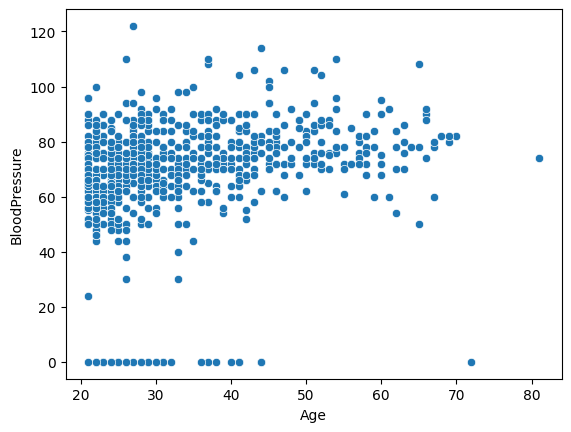

In [4]:
sns.scatterplot(data=df,x='Age',y='BloodPressure')

In [5]:
df[df['BloodPressure'] == 0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1


In [6]:
df.shape

(768, 9)

In [7]:
df.drop(df[df['BloodPressure'] == 0].index,inplace=True)

In [8]:
df.shape

(733, 9)

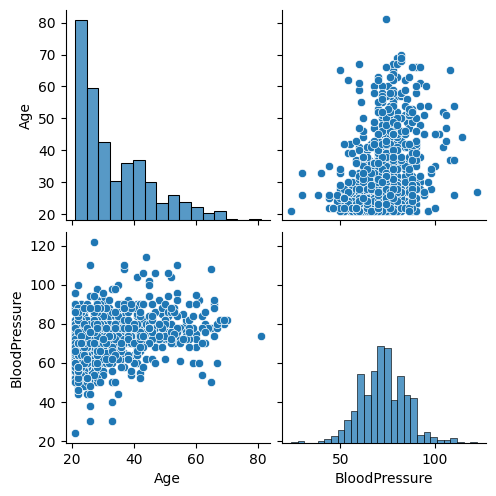

In [9]:
sns.pairplot(df[['Age','BloodPressure']])

In [10]:
df['Age'].describe()

count    733.000000
mean      33.361528
std       11.837077
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [11]:
bins = np.arange(20,100,20)
df1 = df[['Age','BloodPressure']]
group = df1.groupby(pd.cut(df1['Age'],bins)).mean()

<Axes: xlabel='Age'>

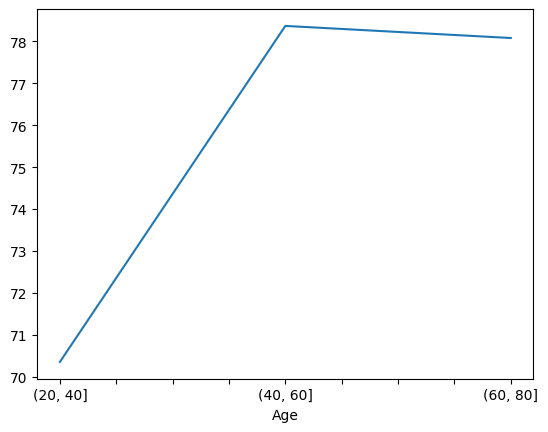

In [12]:
group['BloodPressure'].plot.line()

In [13]:
df.drop(df[df['Insulin'] == 0].index,inplace=True)

In [14]:
features = df[['Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction']]
y = df['Outcome']

In [15]:
from sklearn import tree,metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


In [17]:
print(clf.predict([[120,80,97,67,0.39]]))

[1]


c:\Users\Faisal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
